In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pathlib import Path
import itertools
import numpy as np
import json
import math
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

In [2]:
config ={
    "DATASET_PATH": "dataset",
    "CLASS_NAMES": ["Red Spot", "Brown Petal", "Red Petal + Yellow Spots"]
}
all_metadata = json.loads(
    Path('dataset/metadata.json').read_text()
)
vs_concept = np.loadtxt('dataset/vectors_concept_vector.vec.txt')
vs_context = np.loadtxt('dataset/vectors_context_vector.vec.txt')
all_classes = [m['class_id'] for m in all_metadata]
distinct_classes = sorted(set(all_classes))
vs_concept_distances = pairwise_distances(vs_concept, metric='cosine')
vs_context_distances = pairwise_distances(vs_context, metric='cosine')

In [3]:
print(len(distinct_classes))
print(len(all_classes))
print(len(all_metadata))
print(vs_concept.shape)
print(vs_context.shape)
print(vs_concept_distances.shape)
print(vs_context_distances.shape)

3
300
300
(300, 9)
(300, 21)
(300, 300)
(300, 300)


In [4]:
all_classes = [m['class_id'] for m in all_metadata]

In [12]:
def generate_pedagogic_pairs(criteria, alpha=0.1, beta=0.5):
    for c1, c2 in itertools.combinations(distinct_classes, r=2):
        c1_item_ixes = [ix for ix, c in enumerate(all_classes) if c==c1]
        c2_item_ixes = [ix for ix, c in enumerate(all_classes) if c==c2]
        pairs = list(itertools.product(c1_item_ixes, c2_item_ixes))
        if criteria == 'good':
            pair_scores = [
                alpha * vs_concept_distances[pair[0], pair[1]]
                - beta  * vs_context_distances[pair[0], pair[1]]
                # + 0.125 * classifier_confidences[pair[0]]
                # + 0.125 * classifier_confidences[pair[1]]
                for pair in pairs
            ]
            
        elif criteria == 'random':
            pair_scores = np.random.rand(len(pairs))
        else:
            raise ValueError("Unknown criteria: " + criteria)
            
        for pair_ix in (np.argsort(pair_scores)[::-1])[:2]:
            pair = pairs[pair_ix]
            plt.figure()
            for i in range(2):
                plt.subplot(1,2,i+1)
                img = plt.imread(
                    Path(config['DATASET_PATH']) / f"{all_metadata[pair[i]]['id']}.png"
                )
                plt.imshow(img)
                class_id = all_metadata[pair[i]]['class_id']
                # print(all_metadata[pair[i]])
                plt.title(f"class# {config['CLASS_NAMES'][class_id]}")
            plt.show()
        print("-----------------------------------------")

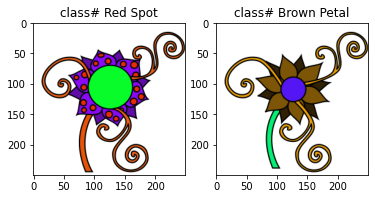

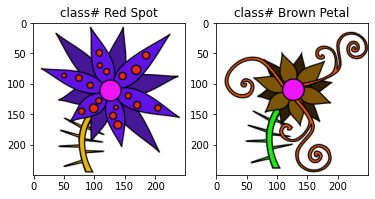

-----------------------------------------


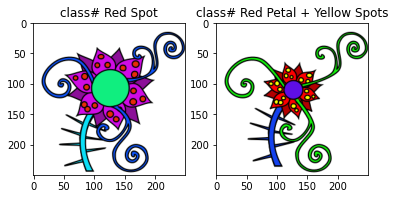

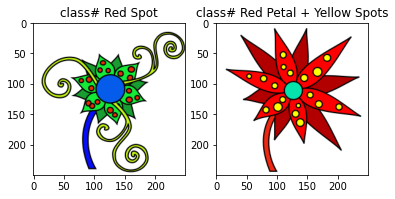

-----------------------------------------


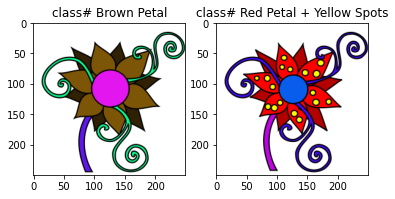

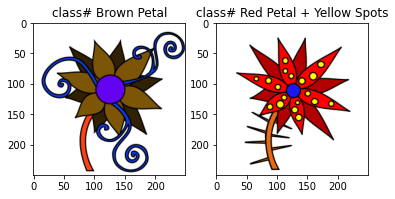

-----------------------------------------


In [13]:
generate_pedagogic_pairs("random")

In [22]:
def f(alpha, beta):
    print(alpha, beta)
    generate_pedagogic_pairs("good", alpha, beta)
    

interact(
    f, 
    alpha=widgets.FloatSlider(min=-1., max=1., step=0.1, value=0), 
    beta=widgets.FloatSlider(min=-1., max=1., step=0.1, value=0, label="aa")
);

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0, min=-1.0), FloatSlider(value=0.0, d…

In [15]:
Alpha: 
    more dissimilarity in relevant features

Beta: 
    Context similarity.
    Distractor suppression. 

SyntaxError: invalid syntax (<ipython-input-15-25aa74b8a1ca>, line 1)